# 1). Выбор фреймворка/библиотеки для использования детектора

Фреймворк pytorch, пртренированная модель fasterrcnn_resnet50_fpn из библиотеке torchvision.models.detection

# 2) Запуск детектора на случайных изображениях

Скачаем претренированную сеть и запустим на случайных изображениях

In [4]:
from PIL import Image
import torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [5]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [6]:
from torchvision import transforms
def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

In [7]:
import cv2
import matplotlib.pyplot as plt
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):

  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  #plt.figure(figsize=(20,30)) # display the output image
  #plt.imshow(img)
  #plt.xticks([])
  #plt.yticks([])
  #plt.show()
  image = Image.fromarray(img)
  return image

In [8]:
image = object_detection_api("pictures for test/1.jpeg")

C:\Users\HP\Anaconda3\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


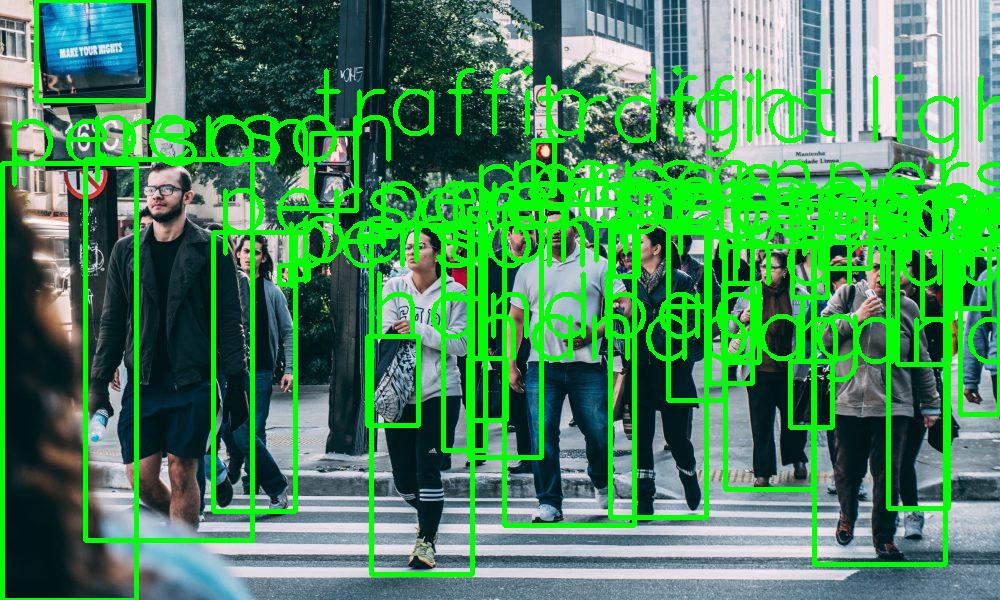

In [9]:
image

In [10]:
image = object_detection_api("pictures for test/2.jpg")

IndexError: list index out of range

In [11]:
image = object_detection_api("pictures for test/3.jpg")

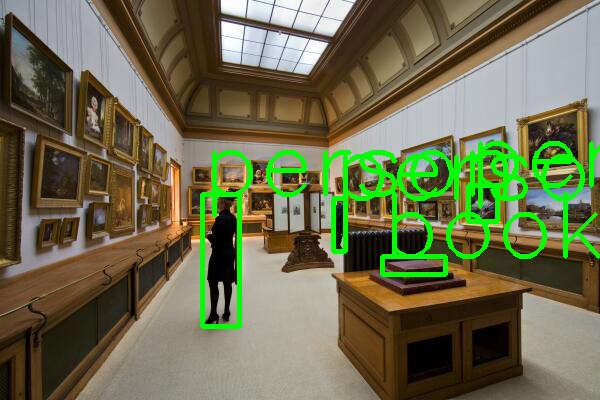

In [12]:
image

На одной картинке сеть довольно хорошо определила людей, на другой выдала ошибку, на третьей не определила картины, но определила человека и книгу. Работа сети требует дальнейшей доработки, но т.к. цель проекта сделать демо, то будем работать с тем качеством сети, которое есть у претренированной.

# 3)  Выбор фреймворка/библиотеки для разработки веб/мобильного демо

Выбираем библиотеку Flask

# 4). Разработка демо

Сделаем так, чтобы у нас была html страница, которая принимает картинку и перенправляет нас на страницу, где будет отображаться измененная до размером 224х224 закаченная картинка. В дальнейшем поменяем логику изменения размера картинки на работу сети.

Такая страница была получена. В качестве результата можно использовать финальный код проекта, где логика уже заменена на работу нейросети

# 5). Встраивание модели-детектора в демо

Изменим логику работы программы так, чтобы картинка обрабатывалась сетью. Для просмотра результатов требуется запустить финальный код проекта

# 6). Тестирование демо

Протестируем нашу систему. Результаты теста прикреплены в качестве скриншотов

Заглавная страница сайта

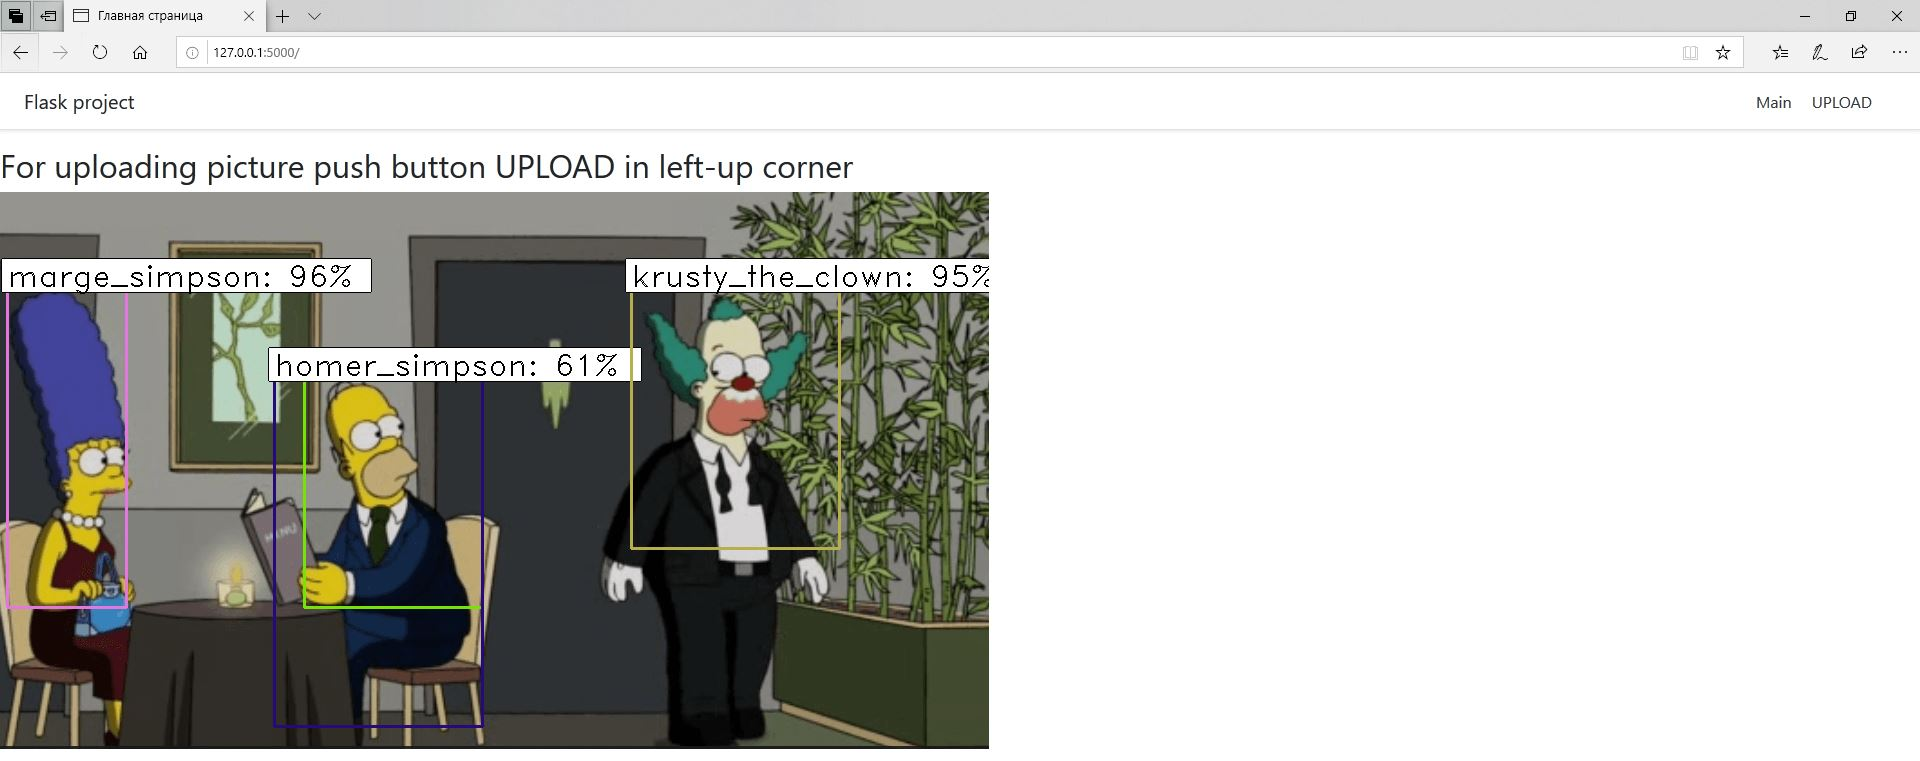

Страница с загрузкой картинки

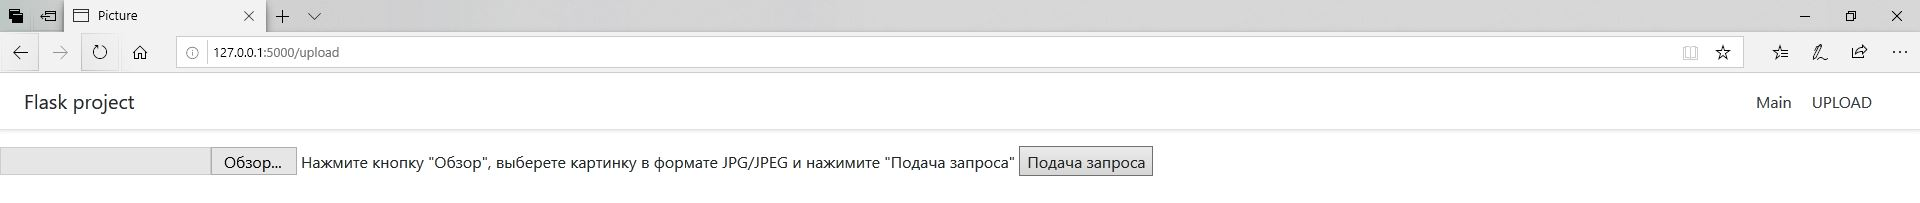

Результат обработки первой картинки

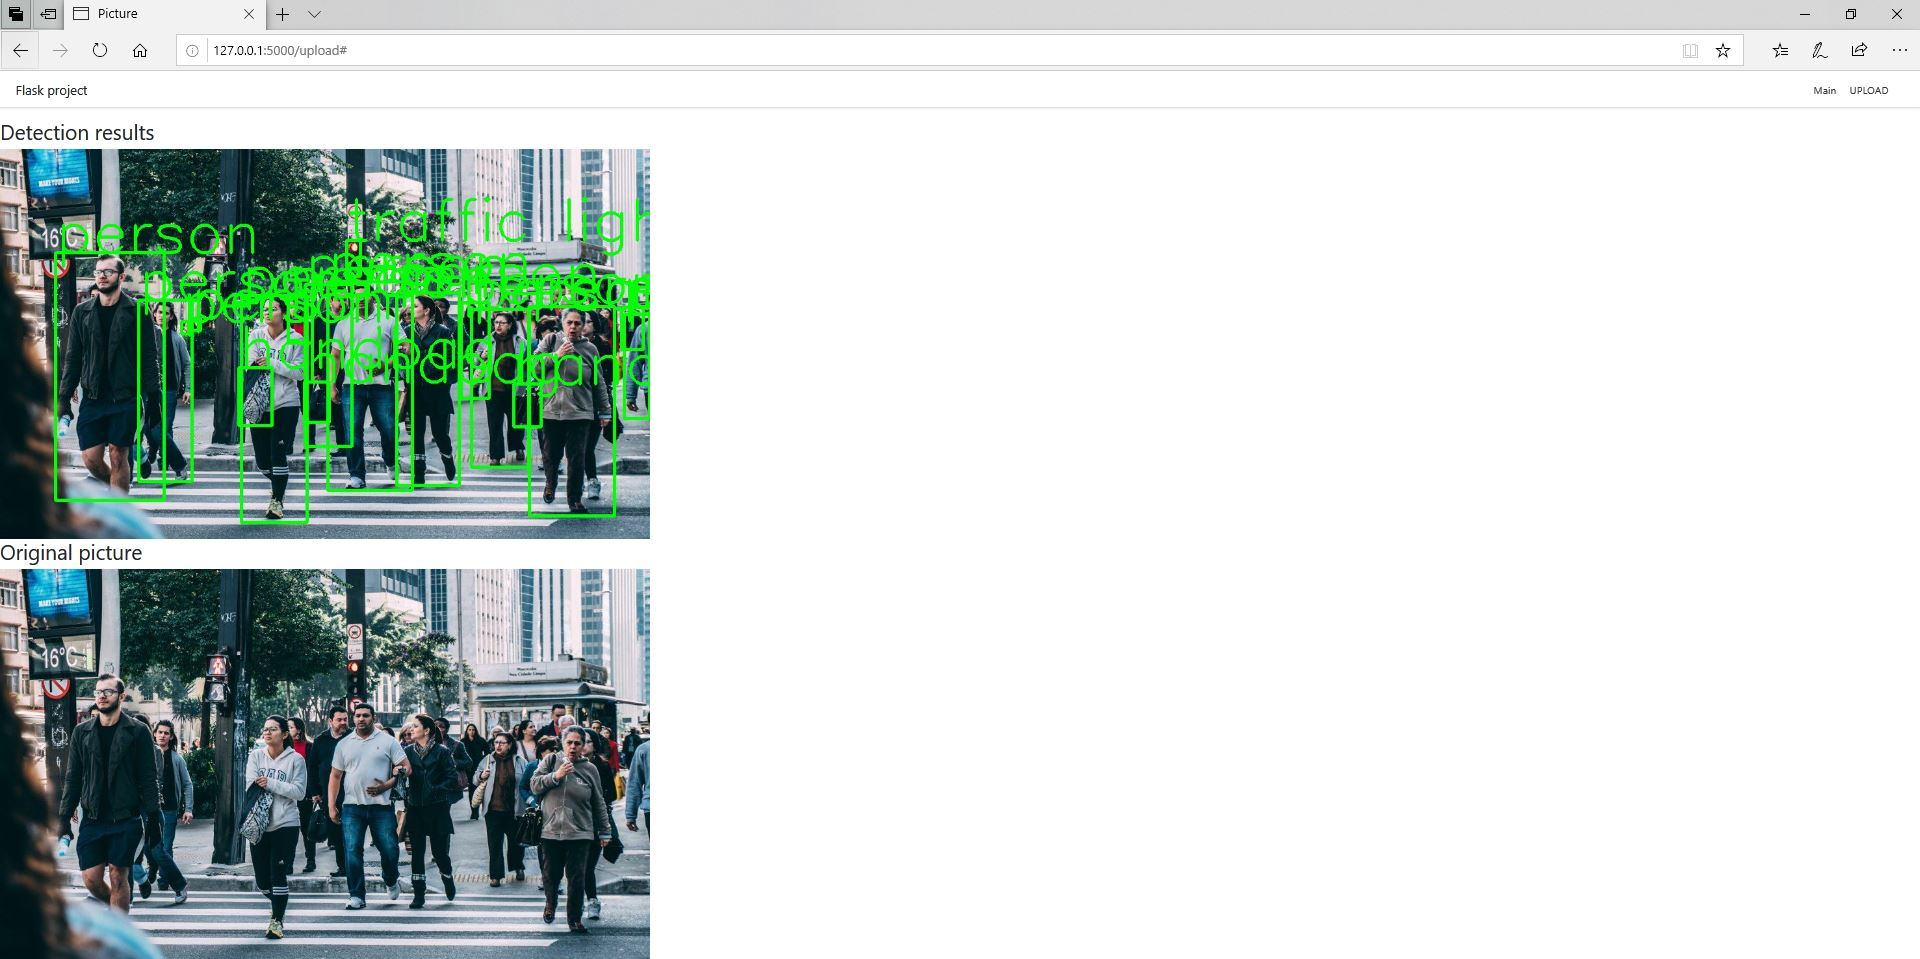

Результат обработки второй картники 

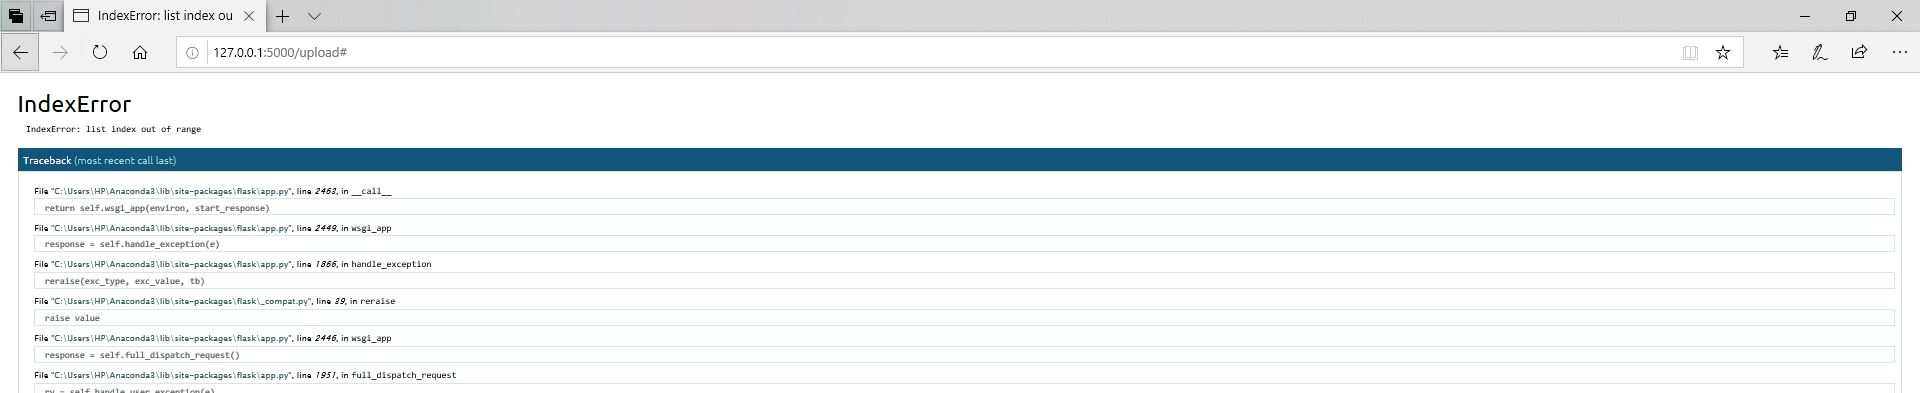

Результат обработки третьей картинки

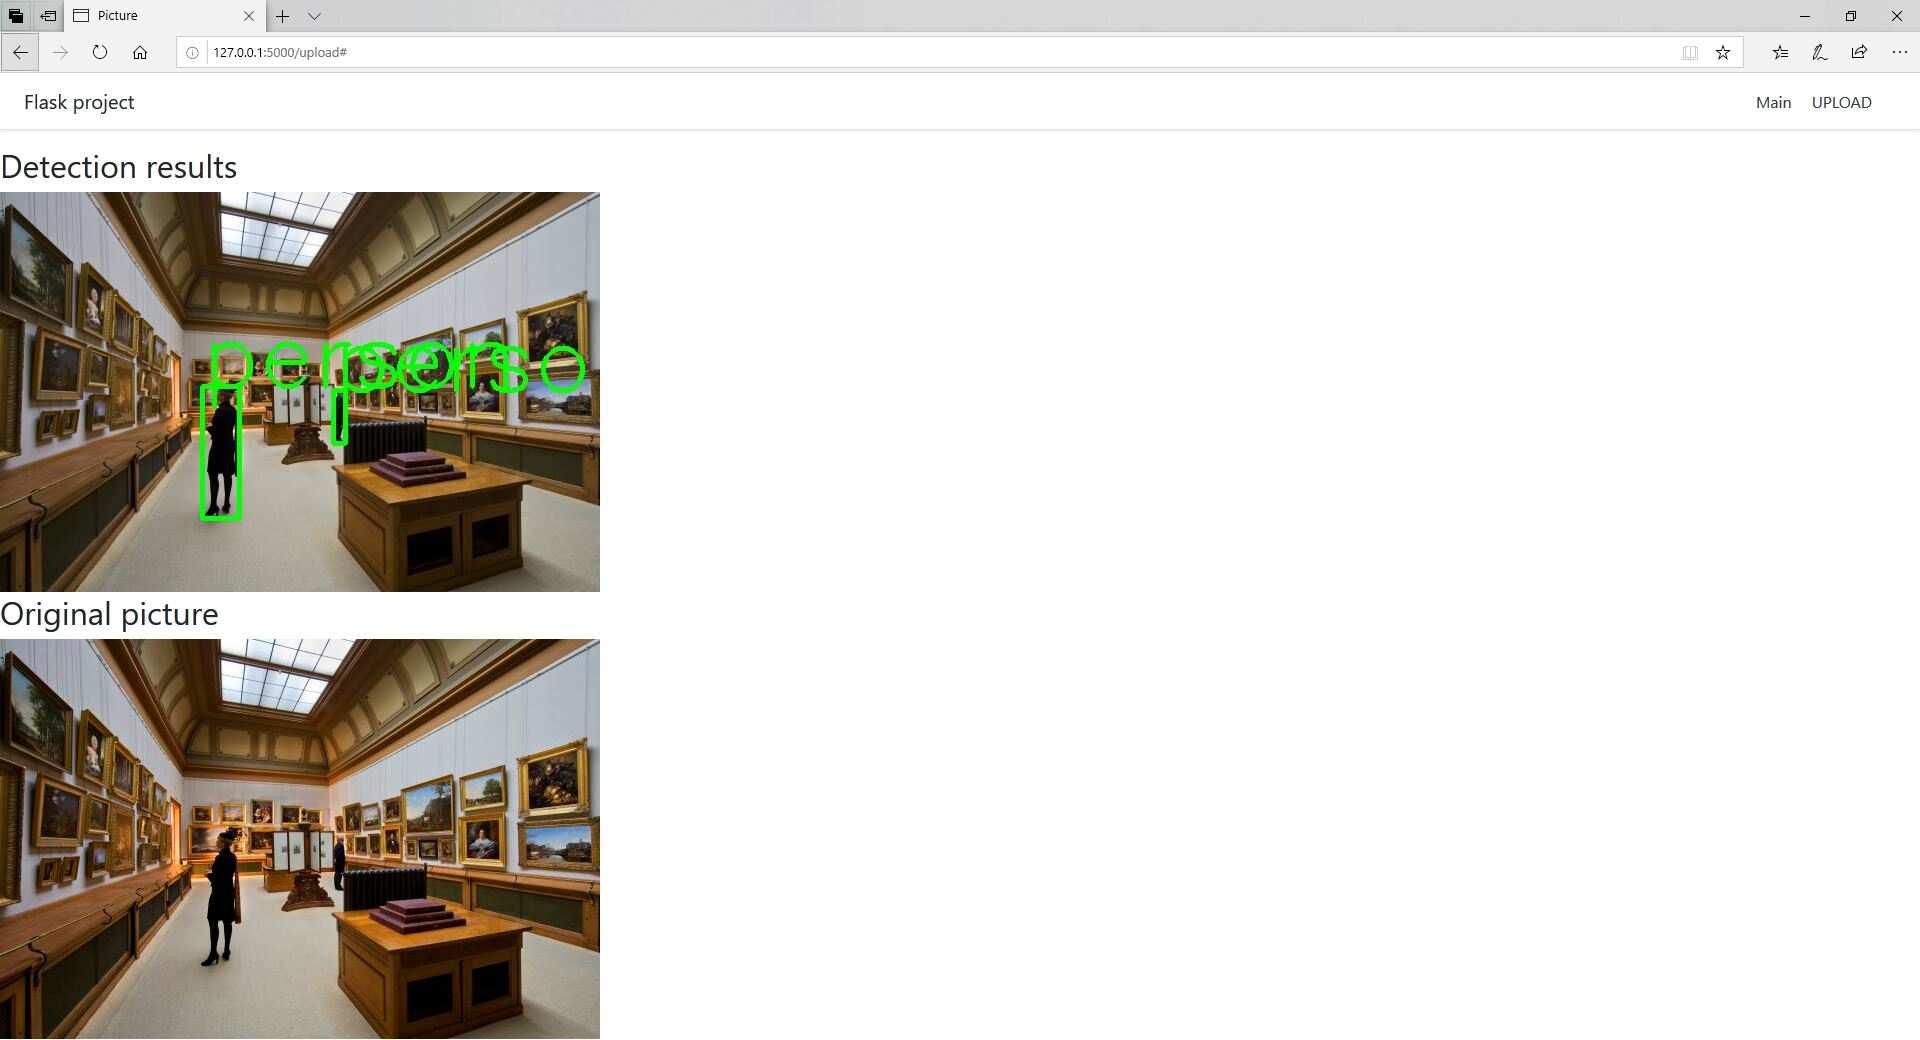

ВЫВОД: Видно, что демо работает в точности как работает сеть. На второй картинки выпадает ошибка, на третьей не детектируются картины

# 7). Оформление демо для показа другим людям

В качестве работы по оформлению был подключен css файл с сайта bootstrap https://stackpath.bootstrapcdn.com/bootstrap/4.5.0/css/bootstrap.min.css

Была вставлена картинка с симпсонами, сделана ссылка на страницу с загрузкой картинки и главную страницу. Страницы базируется на написанном шаблоне (base.html), который можно в дальнейшем настроить для улучшения визуальной составляющей проекта